# Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
datasets = pd.read_csv('Social_Network_Ads.csv')
X = datasets.iloc[:, [2,3]].values
Y = datasets.iloc[:, 4].values

In [3]:
unique_labels = datasets.iloc[:, 4].unique()
print(unique_labels)
unique_labels=np.array(unique_labels)
type(unique_labels)

[0 1]


numpy.ndarray

In [4]:
output=pd.DataFrame(Y)
output.head()

,0
0,0
1,0
2,0
3,0
4,0


In [5]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

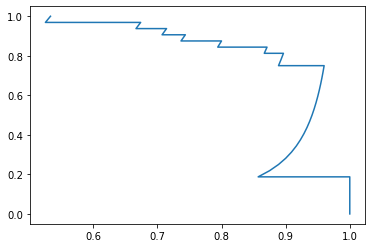

In [6]:
# Fitting the Logistic Regression into the Training set

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve,roc_curve,auc
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_Train, Y_Train)

# Predicting the test set results

Y_Pred = classifier.predict(X_Test)
prob_score=classifier.predict_proba(X_Test)
y_scores = classifier.decision_function(X_Test)
precision, recall, thresholds = precision_recall_curve(Y_Test, y_scores)
plt.figure()
plt.plot(precision, recall, label = 'Precision-Recall Curve')

[[65  3]
 [ 8 24]]


Text(0.5, 13.421126458070283, 'Predicted label')

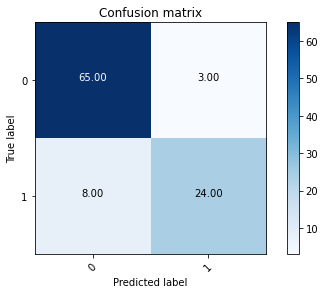

In [21]:
# Making the Confusion Matrix 

from sklearn.metrics import confusion_matrix,precision_score,recall_score

cm = confusion_matrix(Y_Test, Y_Pred)
print(cm)
r=cm.shape[0]
c=cm.shape[1]
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(unique_labels))
plt.xticks(tick_marks, unique_labels, rotation=45)
plt.yticks(tick_marks, unique_labels)

thresh = cm.max() / 2.
for i in range(r):
    for j in range(c):
        plt.text(j, i, format(cm[i, j], '0.2f'),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
# Visualising the Training set results 

#from matplotlib.colors import ListedColormap
#X_Set, Y_Set = X_Train, Y_Train
#X1, X2 = np.meshgrid(np.arange(start = X_Set[:,0].min() -1, stop = X_Set[:, 0].max() +1, step = 0.01),
#                     np.arange(start = X_Set[:,1].min() -1, stop = X_Set[:, 1].max() +1, step = 0.01))

#plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
 #            alpha = 0.75, cmap = ListedColormap(('red', 'green')))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


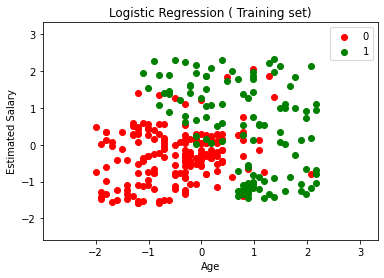

In [22]:
plt.xlim(X1.min(), X2.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j,1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression ( Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [23]:
from sklearn.metrics import classification_report
print(classification_report(Y_Test, Y_Pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



In [24]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(Y_Test,Y_Pred))
print(recall_score(Y_Test,Y_Pred))

0.8888888888888888
0.75


In [25]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [26]:
fpr, tpr, thresholds = roc_curve(Y_Test, Y_Pred)

In [27]:
auc = roc_auc_score(Y_Test, Y_Pred)
print('AUC: %.3f' % auc)

AUC: 0.853


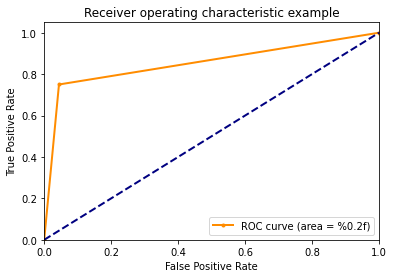

In [28]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',marker='.',
         lw=2, label='ROC curve (area = %0.2f)')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [29]:
from sklearn.linear_model import LogisticRegressionCV

In [30]:
clf = LogisticRegressionCV(cv=5, random_state=0).fit(X_Train, Y_Train)

In [31]:
Y_Pred_cv=clf.predict(X_Test)

In [32]:
prob_score_cv=clf.predict_proba(X_Test)
#print(prob_score_cv)
y_scores_cv = clf.decision_function(X_Test)
print(y_scores_cv)

[-2.15388241 -1.67577437 -1.47703295 -2.42572559 -2.32654291 -5.08133762
 -4.38354823  1.08453736 -5.40258412  0.03866846 -3.44513754 -3.67510084
 -1.72279522 -0.54138077 -4.35709127 -0.70062477 -0.97522647 -4.60799451
  4.73034586 -3.27799405 -2.4284841   3.47068867 -0.99102543  2.14545314
 -5.67718582  3.80259317 -2.5877281  -2.60866804 -1.48493244 -1.75401711
 -4.07220762 -0.90726567  2.78556369 -1.79075602 -4.44085103 -5.94627049
 -4.09314756 -2.78132854 -3.73792066  0.23465136 -2.77067055 -0.95704503
 -2.90659214 -3.34595485  1.51562454 -3.79008249 -0.87328527  2.7203614
 -4.95845648  1.93367127  4.89234837 -3.39297571 -2.08868012 -0.33473988
  4.17086053 -0.76896161 -2.50672685 -3.25943658 -0.03719182 -5.949029
 -4.06468418  2.82468506 -4.91381809 -0.44458055 -6.612838    4.21788138
 -3.38745869 -3.79008249 -1.34386987 -0.12847502  0.42072837 -1.40907216
 -4.70479473 -1.10876559 -2.73669015 -4.92685855  0.17734856 -0.9021247
  1.03438195  2.21341394  5.85683998  4.00095854 -4.542

In [33]:
print(classification_report(Y_Test,Y_Pred_cv))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100

